# Analyse the impact of the data assimilation - Surface Model

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

In [1]:
import xarray as xr

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


##### Two forecasts: The second forecast is initialized 3 hours laters and has thus utilized forecast_1 as model background

In [2]:
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/2018/10/24/arome_arctic_sfx_2_5km_20191024T15Z.nc'
forecast_1 = xr.open_dataset(url)

In [3]:
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/2018/10/24/arome_arctic_sfx_2_5km_20181024T18Z.nc'
forecast_2 = xr.open_dataset(url)

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,78.24,15.46) # For example for Longyearbyen

In [13]:
t2m_point_forecast_1 = forecast_1.TS[:,ix,jx]
t2m_point_forecast_2 = forecast_2.TS[:,ix,jx]

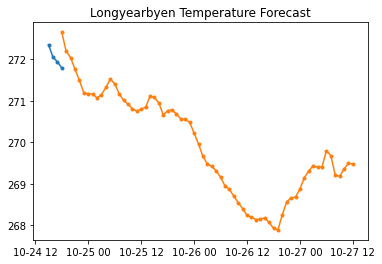

In [14]:
from matplotlib import pyplot as plt

plt.plot(forecast_1.time, t2m_point_forecast_1, '.-')
plt.plot(forecast_2.time, t2m_point_forecast_2, '.-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

### Plot one forecast on a map

/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


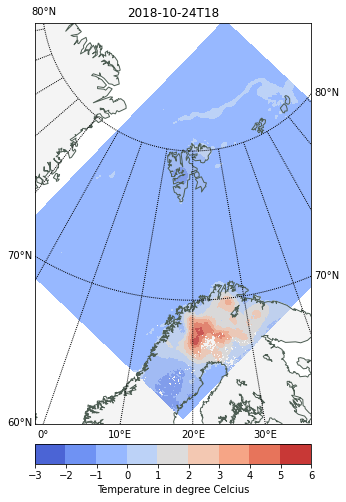

In [12]:
from mpl_toolkits.basemap import Basemap

timestep_1=3
timestep_2=0

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.TS[timestep_1,:,:])- np.array(forecast_2.TS[timestep_2,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')                  